# Scene Text Detection with CRAFT

This notebook uses an open source implementation of the paper [Character Region Awareness for Text Detection](https://arxiv.org/abs/1904.01941) to detect scene text on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CRAFT

 Install the open source project [CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch.git):

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained model

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}


pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'

## Detect scene text on a test image

First, dowload a test image from internet:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


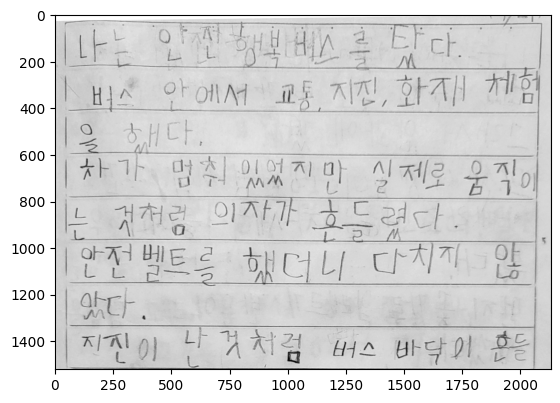

In [ ]:
import cv2
img_path = '/content/drive/MyDrive/HandChive_와빅_컨퍼런스/Detection_Data/EDU_E1_038049.png'
img = matplotlib.image.imread(img_path)
plt.imshow(img)

Run CRAFT on the above test image:

In [ ]:
# basenet 폴더의 vgg16_bn.py에서 [from torchvision.models.vgg import model_urls, from torchvision.models.vgg import model_urls] 이 코드 삭제
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --test_folder=/content/drive/MyDrive/HandChive_와빅_컨퍼런스/Detection_Data/

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (../craft_mlt_25k.pth)
elapsed time : 4.494275808334351s


Now, visualize the result:

In [ ]:
source_folder = '/content/CRAFT-pytorch/result'
for filename in os.listdir(source_folder)[:9]:
    if ('jpg' in filename) and ('mask' not in filename):
        source_file = os.path.join(source_folder, filename)
        print(source_file)
        plt.figure(figsize=(20, 26))
        plt.imshow(matplotlib.image.imread(source_file))

Output hidden; open in https://colab.research.google.com to view.

In [21]:
from google.colab import drive
import shutil
import os

# 복사할 파일이 있는 폴더 경로
source_folder = '/content/CRAFT-pytorch/result'  # 실제 폴더 경로로 변경

# 드라이브에 저장할 폴더 경로
destination_folder = '/content/drive/MyDrive/HandChive_와빅_컨퍼런스/Detection_Output'  # 실제 폴더 경로로 변경

# 폴더 생성 (이미 존재하는 경우 생략)
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 폴더 내 파일 복사
for filename in os.listdir(source_folder):
    if 'mask' not in filename:
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.copy(source_file, destination_file)
        print(f'파일 복사: {filename}')

print('파일 복사가 완료되었습니다.')


파일 복사: res_EDU_E1_041036.jpg
파일 복사: res_EDU_E1_038049.jpg
파일 복사: res_EDU_E1_038049.txt
파일 복사: res_EDU_E1_038205.txt
파일 복사: res_testimage2.txt


IsADirectoryError: ignored